In [1]:
import os
from Bio.PDB import PDBParser
import numpy as np
import itertools

In [2]:
def get_coordinates(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    coords = []

    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    coords.append(atom.get_coord())
    
    return np.array(coords)

def calculate_euclidean_distance(coords1, coords2):
    if coords1.shape != coords2.shape:
        raise ValueError("The two structures have different number of atoms.")
    
    distance = np.sqrt(np.sum((coords1 - coords2) ** 2, axis=1))
    return np.mean(distance)

def batch_calculate_distances(folder1_files, folder2_files):
    folder1_coordinates = {pdb_file: get_coordinates(pdb_file) for pdb_file in folder1_files}
    folder2_coordinates = {pdb_file: get_coordinates(pdb_file) for pdb_file in folder2_files}
    
    num_files1 = len(folder1_files)
    num_files2 = len(folder2_files)
    distance_matrix = np.zeros((num_files1, num_files2))

    for i, pdb1 in enumerate(folder1_files):
        coords1 = folder1_coordinates[pdb1]
        for j, pdb2 in enumerate(folder2_files):
            coords2 = folder2_coordinates[pdb2]
            distance = calculate_euclidean_distance(coords1, coords2)
            distance_matrix[i, j] = distance

    return distance_matrix

In [3]:
# two folder
folder1 = 'gen'
folder2 = 'ori'

In [4]:
# Get all PDB files in both directories
folder1_files = [os.path.join(folder1, f) for f in os.listdir(folder1) if f.endswith('.pdb')]
folder2_files = [os.path.join(folder2, f) for f in os.listdir(folder2) if f.endswith('.pdb')]

# Calculate the Euclidean distance matrix between all PDB files in two folders
distance_matrix = batch_calculate_distances(folder1_files, folder2_files)

In [5]:
# print result
print("Distance Matrix:")
print(distance_matrix)

Distance Matrix:
[[2.87914658 3.28016233 3.15407777 ... 4.56338072 4.53892374 3.18659806]
 [2.79532003 3.00211453 3.03625655 ... 4.38459778 4.36985493 3.04021406]
 [2.68616056 2.44638729 2.76728058 ... 3.77898169 3.74805737 2.69505191]
 ...
 [2.55803061 2.50547647 2.67526245 ... 3.80844712 3.80855608 2.6630888 ]
 [3.46846938 3.33411837 3.53771067 ... 4.53628349 4.51610947 3.48800898]
 [2.59926057 2.63166928 2.73592353 ... 3.91788888 3.9085393  2.71288252]]


In [6]:
# save result
np.savetxt("distance_matrix.csv", distance_matrix, delimiter=",", fmt="%.4f")

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

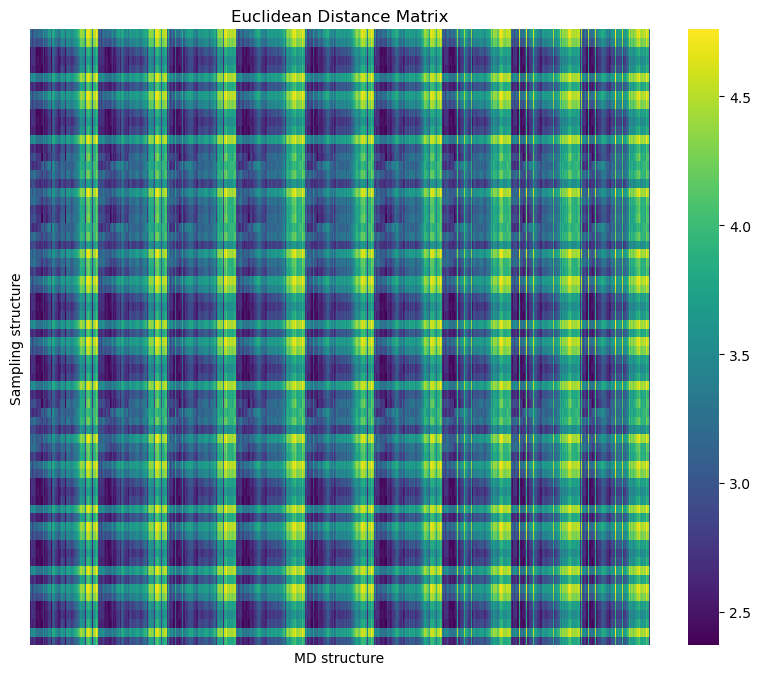

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, xticklabels=[os.path.basename(f) for f in folder2_files], 
            yticklabels=[os.path.basename(f) for f in folder1_files], annot=False, cmap="viridis")
plt.title('Euclidean Distance Matrix')
plt.xlabel('MD structure')
plt.ylabel('Sampling structure')
plt.xticks([])
plt.yticks([])
plt.savefig('edm_v1.tif', dpi=300)
plt.show()